# Convolutional Neural Network for Hotspot Detection on ICCAD2012

### Importing the libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from IPython.display import Image
import time
import os
import copy

In [42]:
tf.__version__

'2.9.1'

### Global Parameters

In [85]:
SIZE = 128
# Image Parameters in the future can be added to the channels
CHANNELS = 3
DROPOUT_RATE = 0.5
BATCH_SIZE = 32
CLASSES = {'NHS':0, 'HS':1}

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [86]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True)
training_set = train_datagen.flow_from_directory(directory = 'iccad1/train',
                                                 target_size = (SIZE, SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 classes = CLASSES,
                                                 class_mode = 'binary',
                                                 shuffle = True,
                                                 seed = 42
                                                )

Found 439 images belonging to 2 classes.


### Preprocessing the Test set

In [87]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(directory = 'iccad1/test',
                                            target_size = (SIZE, SIZE),
                                            batch_size = BATCH_SIZE,
                                            classes = CLASSES,
                                            class_mode = 'binary',
                                            shuffle = True,
                                            seed = 42
                                            )

Found 4905 images belonging to 2 classes.


## Part 2 - Building the CNN

In [107]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Convolutional & Pooling Layers
cnn.add(tf.keras.layers.Conv2D(filters=4, kernel_size=3, activation='relu', input_shape=[SIZE, SIZE, CHANNELS]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection Layers
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(DROPOUT_RATE))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(DROPOUT_RATE))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# For multiclass classification, softmax should be used as activation function.
#cnn.add(tf.keras.layers.Dense(units=n, activation='softmax'))

### Model Summary

In [108]:
cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 126, 126, 4)       112       
                                                                 
 batch_normalization_63 (Bat  (None, 126, 126, 4)      16        
 chNormalization)                                                
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 63, 63, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 61, 61, 8)         296       
                                                                 
 batch_normalization_64 (Bat  (None, 61, 61, 8)        32        
 chNormalization)                                                
                                                     

## Part 3 - Training the CNN

### Compiling the CNN

In [109]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.99)
# opt = 'adam'  #This optimizer can be used for comparison
cnn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
# For multiclass classification:
# cnn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [111]:
start_time = time.time()
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 16)
end_time = time.time()
print("\n********Time used for training: ", end_time - start_time)

Epoch 1/16
14/14 [==============================] - 26s 2s/step - loss: 1.1813 - accuracy: 0.7608 - val_loss: 0.5636 - val_accuracy: 0.9539
Epoch 2/16
14/14 [==============================] - 25s 2s/step - loss: 0.5533 - accuracy: 0.7472 - val_loss: 0.5347 - val_accuracy: 0.9523
Epoch 3/16
14/14 [==============================] - 24s 2s/step - loss: 0.5021 - accuracy: 0.7995 - val_loss: 0.3797 - val_accuracy: 0.9539
Epoch 4/16
14/14 [==============================] - 25s 2s/step - loss: 0.5429 - accuracy: 0.7745 - val_loss: 0.2711 - val_accuracy: 0.9539
Epoch 5/16
14/14 [==============================] - 26s 2s/step - loss: 0.4640 - accuracy: 0.7927 - val_loss: 0.2878 - val_accuracy: 0.9507
Epoch 6/16
14/14 [==============================] - 25s 2s/step - loss: 0.4121 - accuracy: 0.7995 - val_loss: 0.3500 - val_accuracy: 0.8924
Epoch 7/16
14/14 [==============================] - 25s 2s/step - loss: 0.4111 - accuracy: 0.8132 - val_loss: 0.3084 - val_accuracy: 0.9068
Epoch 8/16
14/14 [==

### Plot the training and validation accuracy and loss at each epoch

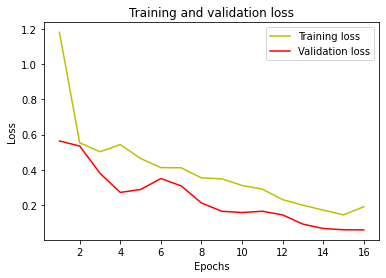

In [112]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

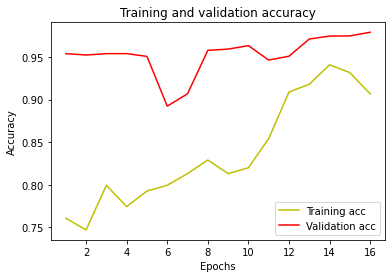

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Save CNN model

In [114]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
cnn.save('cnn.h5')

# Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('cnn.h5')
# Show the model architecture
# new_model.summary()

In [115]:
# https://youtu.be/NVY0FucNRU4
# Save only weights
cnn.save_weights('cnn_weights.h5')

# cnn.load_weights('cnn_weights.h5')

# Save only architecture
jason_string = cnn.to_json()
with open("cnn_model.json", "w") as f:
    f.write(jason_string)

with open("cnn_model.json", "r") as f:
    loaded_json_string = f.read()
    
#new_model = keras.model.model_from_json(loaded_json_string)
#print(new_model.summary())


## Part 4 - Making a single prediction

In [116]:
def single_predict(fileName):
    path = 'iccad1/single_prediction/' + fileName + '.png'
    test_image = image.load_img(path, target_size = (SIZE, SIZE))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    #print(test_image)
    result = cnn.predict(test_image/255.0)
    print(result)
    training_set.class_indices
    print(training_set.class_indices)
    if result[0][0] > 0.5:
      prediction = 'HS'
    else:
      prediction = 'NHS'

    print(prediction)
    
def showPNG(fileName):
    path = 'iccad1/single_prediction/' + fileName + '.png'
    display(Image(path, width = 200, height = 200))

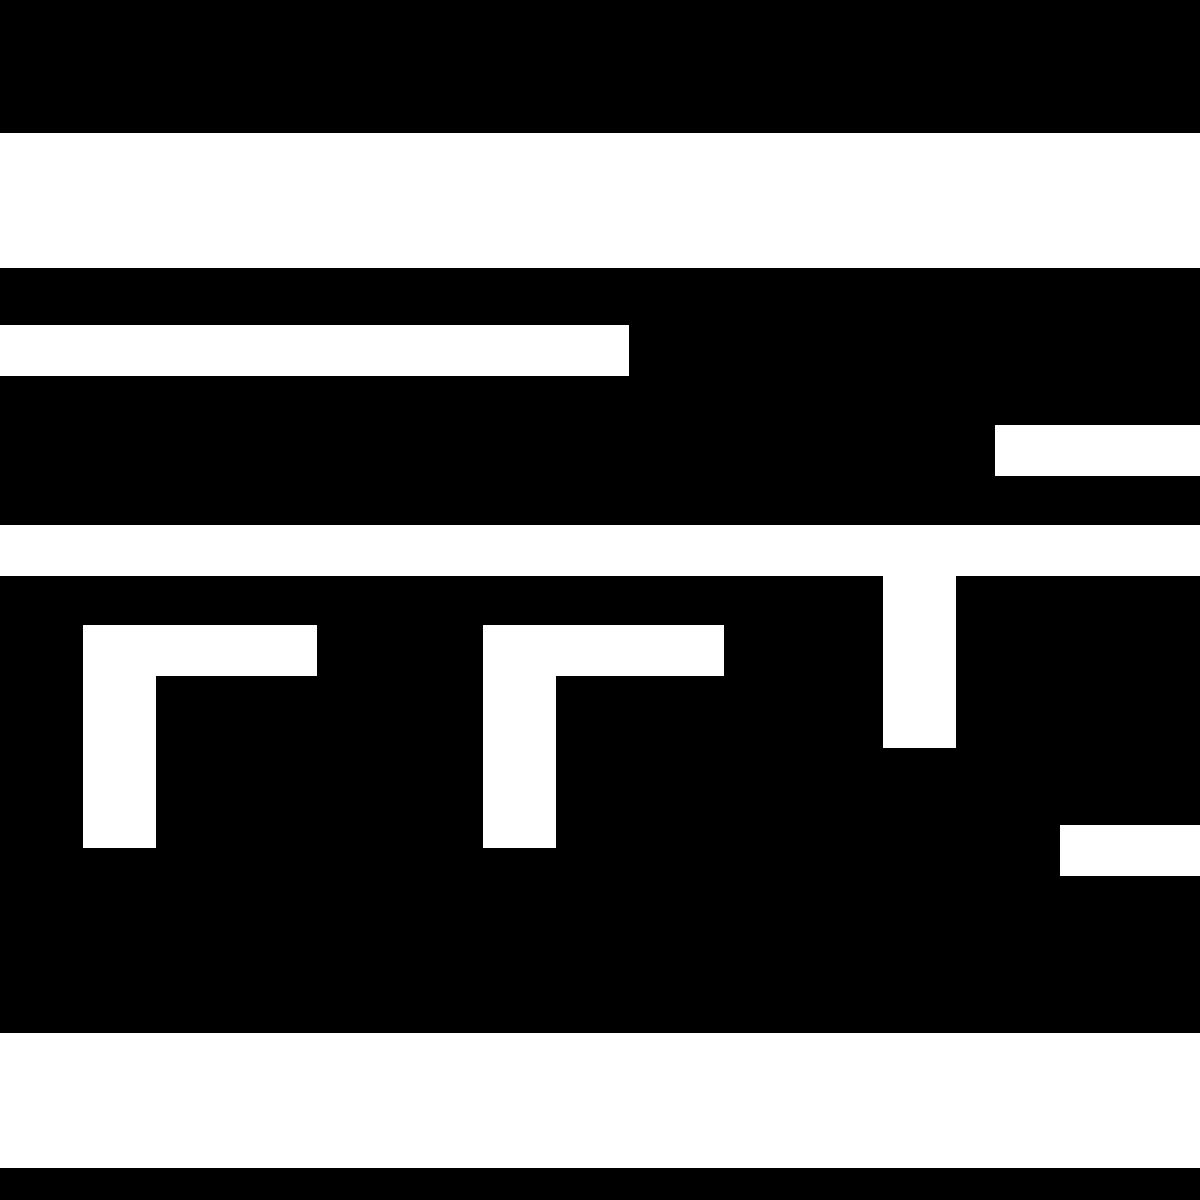

In [117]:
showPNG('test_HS12')

In [118]:
single_predict('test_HS12')

1/1 [==============================] - 0s 112ms/step
[[0.75417656]]
{'NHS': 0, 'HS': 1}
HS


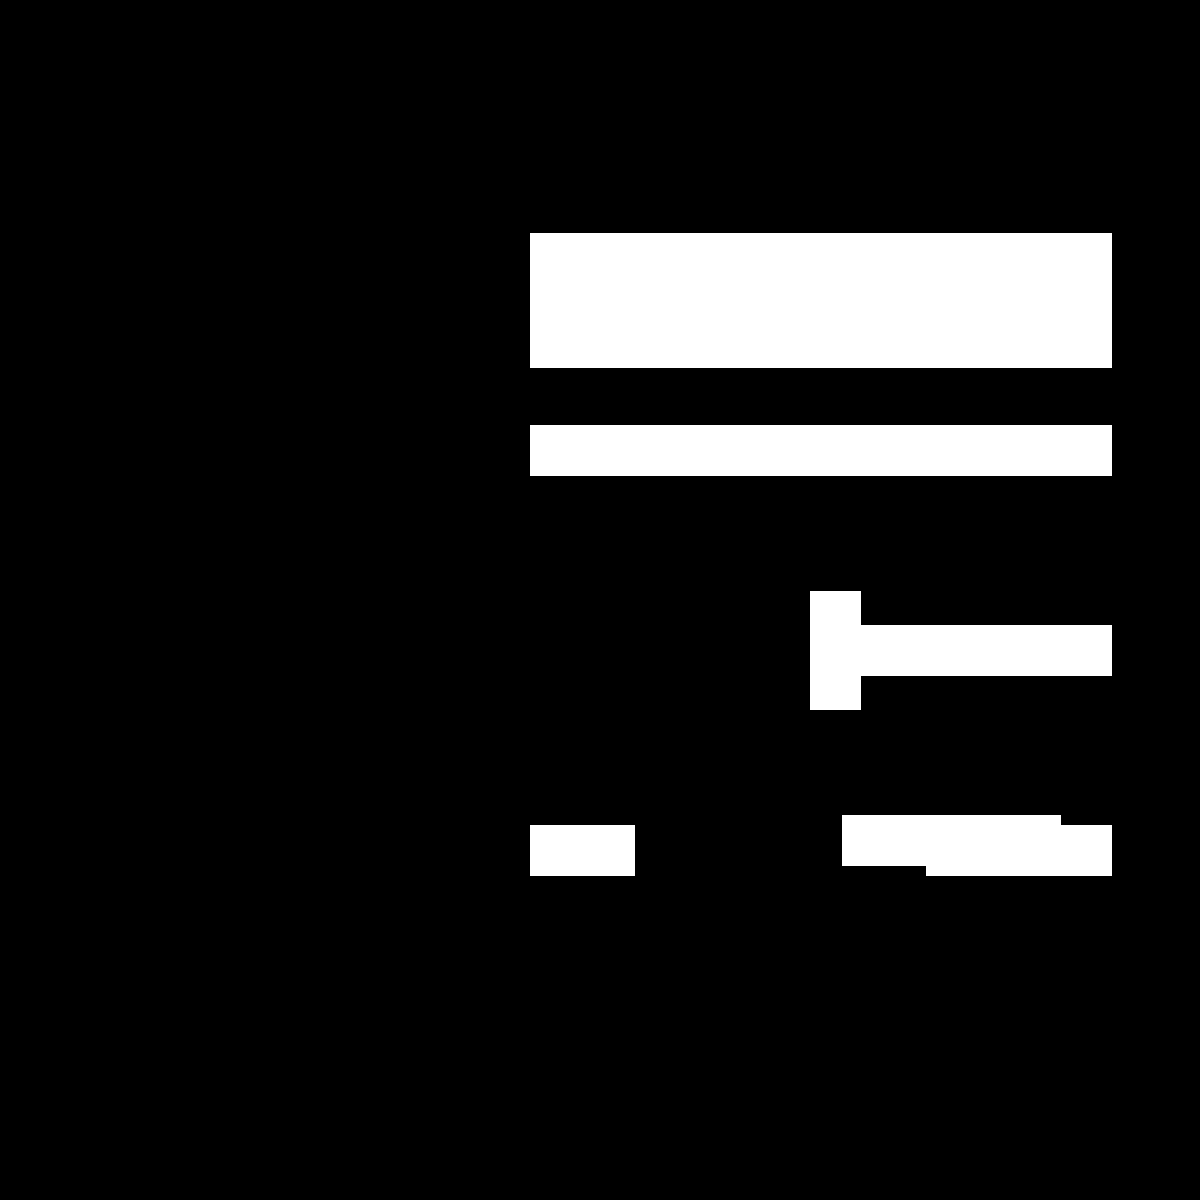

In [119]:
showPNG('test_NHS133.png1')

In [120]:
single_predict('test_NHS133.png1')

1/1 [==============================] - 0s 17ms/step
[[0.16019106]]
{'NHS': 0, 'HS': 1}
NHS


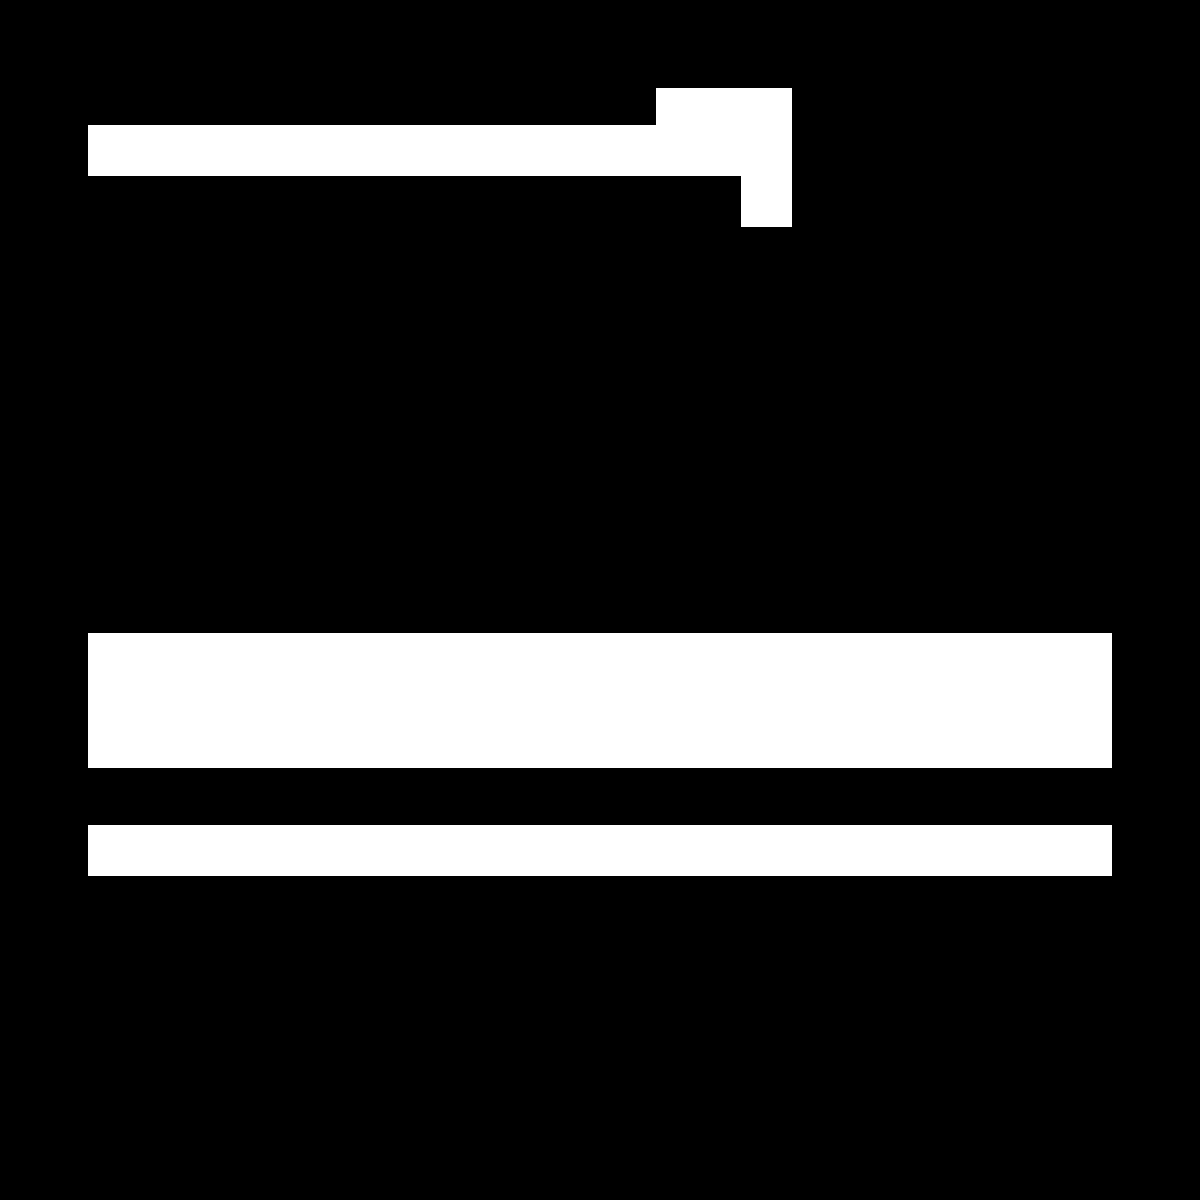

In [121]:
showPNG('test_NHS108.png9')

In [122]:
single_predict('test_NHS108.png9')

1/1 [==============================] - 0s 16ms/step
[[0.00058153]]
{'NHS': 0, 'HS': 1}
NHS


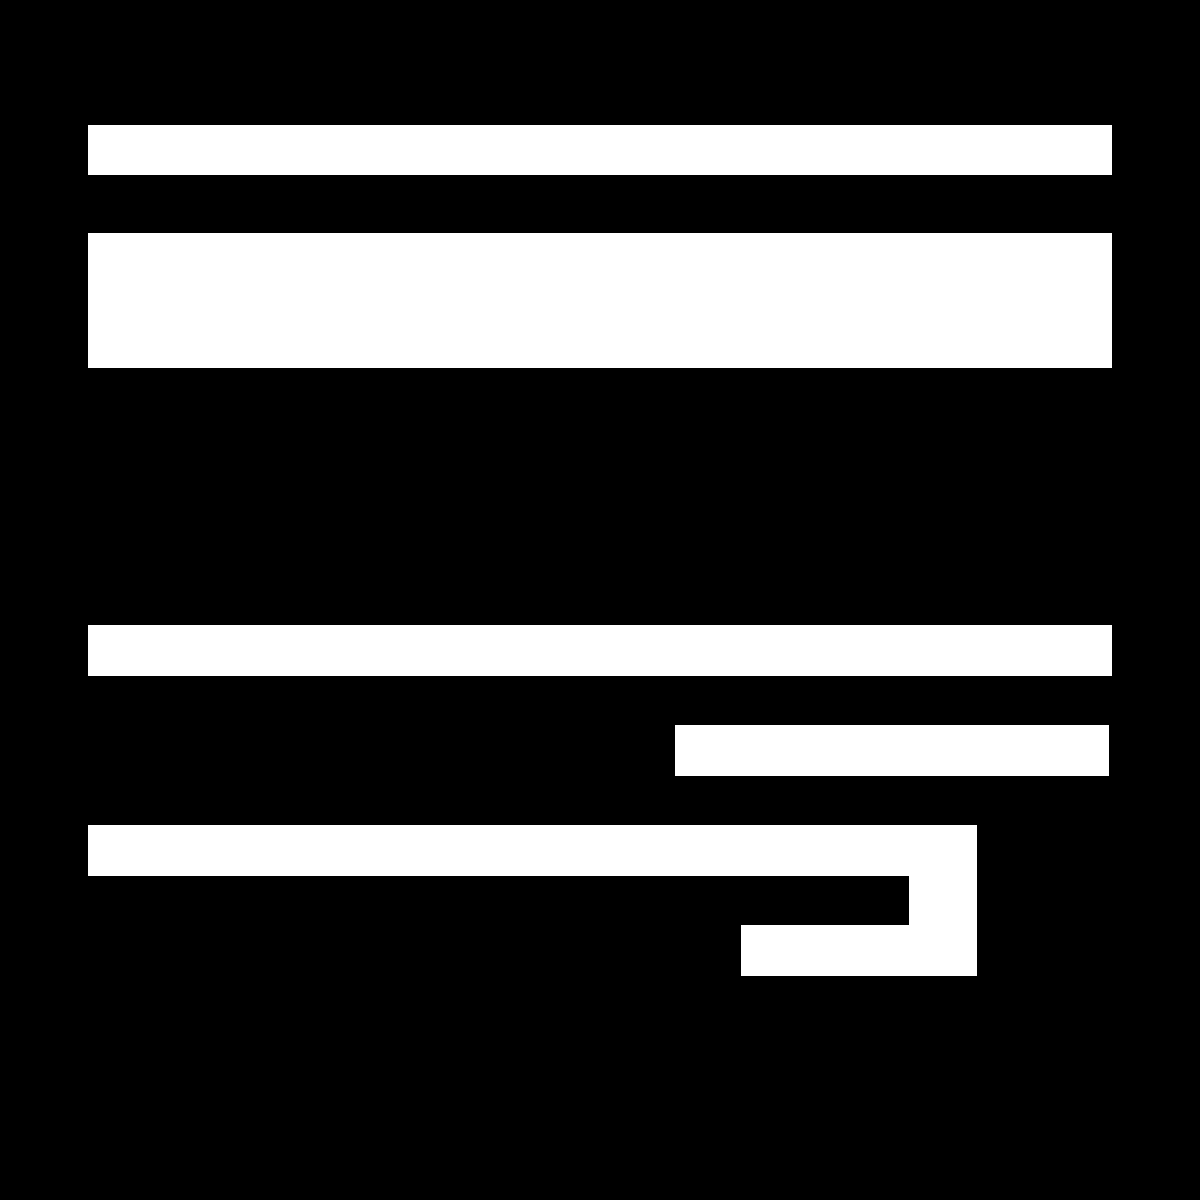

In [123]:
showPNG('test_NHS10.png2')

In [124]:
single_predict('test_NHS10.png2')

1/1 [==============================] - 0s 13ms/step
[[0.01525047]]
{'NHS': 0, 'HS': 1}
NHS


## Part 5 - Making group predictions

### Set path for test files

In [125]:
path = 'group_prediction/'
files = os.listdir(path)
pos_examples = []
neg_examples = []
for fileName in files:
    if fileName.startswith("HS"):
        pos_examples.append((fileName, 1))
    else:
        neg_examples.append((fileName, 0))

test_img_count = len(files)        
pos_count = len(pos_examples)
neg_count = len(neg_examples)
print(test_img_count, "images are loaded, including", pos_count, "HS patterns and", neg_count, "NHS patterns.")
#print(pos_examples)
#print(neg_examples)
labeled_files = copy.deepcopy(pos_examples)
labeled_files.extend(neg_examples)
print(labeled_files)

200 images are loaded, including 100 HS patterns and 100 NHS patterns.
[('HSCAD30.png', 1), ('HSCAD31.png', 1), ('HSCAD310.png', 1), ('HSCAD3100.png', 1), ('HSCAD31000.png', 1), ('HSCAD31001.png', 1), ('HSCAD31002.png', 1), ('HSCAD31003.png', 1), ('HSCAD31004.png', 1), ('HSCAD31005.png', 1), ('HSCAD31006.png', 1), ('HSCAD31007.png', 1), ('HSCAD31008.png', 1), ('HSCAD31009.png', 1), ('HSCAD3101.png', 1), ('HSCAD31010.png', 1), ('HSCAD31011.png', 1), ('HSCAD31012.png', 1), ('HSCAD31013.png', 1), ('HSCAD31014.png', 1), ('HSCAD31015.png', 1), ('HSCAD31016.png', 1), ('HSCAD31017.png', 1), ('HSCAD31018.png', 1), ('HSCAD31019.png', 1), ('HSCAD3102.png', 1), ('HSCAD31020.png', 1), ('HSCAD31021.png', 1), ('HSCAD31022.png', 1), ('HSCAD31023.png', 1), ('HSCAD31024.png', 1), ('HSCAD31025.png', 1), ('HSCAD31026.png', 1), ('HSCAD31027.png', 1), ('HSCAD31028.png', 1), ('HSCAD31029.png', 1), ('HSCAD3103.png', 1), ('HSCAD31030.png', 1), ('HSCAD31031.png', 1), ('HSCAD31032.png', 1), ('HSCAD31033.png', 1

### Loop through images and calculate confusion matrix

In [127]:
def group_predict(labeled_files, path):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for labeled_file in labeled_files:
        img_path = path + labeled_file[0]
        test_image = image.load_img(img_path, target_size = (SIZE, SIZE))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = cnn.predict(test_image/255.0)
        #print(result)
        training_set.class_indices
        if result[0][0] > 0.5:
          prediction = 1
        else:
          prediction = 0
        
        if labeled_file[1] == 1 and prediction == 1:
            TP += 1
        elif labeled_file[1] == 0 and prediction == 0:
            TN += 1
        elif labeled_file[1] == 1 and prediction == 0:
            FN += 1
        elif labeled_file[1] == 0 and prediction == 1:
            FP += 1
        
    return (TP, TN, FP, FN)
    
        
(TP, TN, FP, FN) = group_predict(labeled_files, path)

1/1 [==============================] - 0s 13ms/step


### Calculate metrics

In [130]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1_score = 2 * precision * recall / (precision + recall)
print(TP, TN, FP, FN)
print(accuracy, recall, precision, F1_score)

99 23 77 1
0.61 0.99 0.5625 0.717391304347826


###  Plot precision-recall performance and compare with other researchers' work

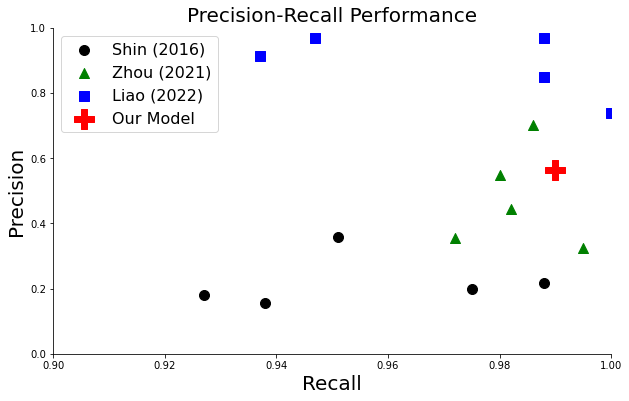

In [159]:
# Values from previous researchers 
# Shin, M.; Lee, J.-H. Accurate Lithography Hotspot Detection Using Deep Convolutional Neural Networks. J. Micro/Nanolith.
# MEMS MOEMS 2016, 15, 043507.
# Zhou, K.; Zhang, K.; Liu, J.; Liu, Y.; Liu, S.; Cao, G.; Zhu, J. An Imbalance Aware Lithography Hotspot Detection Method Based
# on HDAM and Pre-trained GoogLeNet. Meas. Sci. Technol. 2021, 32, 125008.
# Liao, L.; Li, S.; Che, Y.; Shi, W.;Wang, X. Lithography Hotspot Detection Method Based on Transfer Learning Using Pre-Trained
# Deep Convolutional Neural Network. Appl. Sci. 2022, 12, 2192. https://doi.org/10.3390/app12042192

Shin_recall = [0.951, 0.988, 0.975, 0.938, 0.927]
Shin_precision = [0.358, 0.216, 0.199, 0.157, 0.181]
Zhou_recall = [0.995, 0.986, 0.982, 0.972, 0.980]
Zhou_precision = [0.324, 0.702, 0.443, 0.355, 0.549]
Liao_recall = [0.947, 0.988, 0.988, 0.937, 1.000]
Liao_precision = [0.968, 0.850, 0.967, 0.913, 0.737]

dia = 100
colors = ['black','green','blue','red']
markers = ['o', '^', 's', 'P']
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
ax.scatter(Shin_recall, Shin_precision, label='Shin (2016)', c = colors[0], s = dia, marker = markers[0])
ax.scatter(Zhou_recall, Zhou_precision, label='Zhou (2021)', c = colors[1], s = dia, marker = markers[1])
ax.scatter(Liao_recall, Liao_precision, label='Liao (2022)', c = colors[2], s = dia, marker = markers[2])
ax.scatter(recall, precision, label='Our Model', c = colors[3], s = 4 * dia, marker = markers[3])

ax.set_xlim([0.9, 1])
ax.set_ylim([0, 1])

fsize = 20
ax.set_xlabel('Recall', fontsize = fsize)
ax.set_ylabel('Precision', fontsize = fsize)
ax.set_title('Precision-Recall Performance', fontsize = fsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize = fsize-4)
plt.show()